In [138]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
from fbprophet import Prophet
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [139]:
monthly_df = pd.read_csv(r"monthly.csv",sep=';',engine='python',names=['Year', 'Month', 'Decimal Date', 'Sunspot Number', 'Standard Deviation', 'Number of Observations', 'Definitive/Provisional indicator'],parse_dates= {"Date" : ["Year","Month"]})
monthly_df.replace({
    "Sunspot Number":-1,
    "Standard Deviation":-1
},np.NaN,inplace=True)
monthly_df.dropna(how="any",inplace=True)

In [140]:
#monthly mean data
monthly_df

,Date,Decimal Date,Sunspot Number,Standard Deviation,Number of Observations,Definitive/Provisional indicator
828,1818-01-01,1818.042,58.1,9.7,8,1
829,1818-02-01,1818.123,37.4,7.8,14,1
830,1818-03-01,1818.204,42.4,8.3,14,1
831,1818-04-01,1818.288,57.5,9.6,21,1
832,1818-05-01,1818.371,88.5,11.9,25,1
...,...,...,...,...,...,...
3262,2020-11-01,2020.873,34.5,8.1,1238,1
3263,2020-12-01,2020.958,23.1,6.0,998,1
3264,2021-01-01,2021.042,10.4,4.7,833,0
3265,2021-02-01,2021.122,8.3,4.2,959,0


In [141]:
monthly_df.head()

,Date,Decimal Date,Sunspot Number,Standard Deviation,Number of Observations,Definitive/Provisional indicator
828,1818-01-01,1818.042,58.1,9.7,8,1
829,1818-02-01,1818.123,37.4,7.8,14,1
830,1818-03-01,1818.204,42.4,8.3,14,1
831,1818-04-01,1818.288,57.5,9.6,21,1
832,1818-05-01,1818.371,88.5,11.9,25,1


In [142]:
monthly_df.tail()

,Date,Decimal Date,Sunspot Number,Standard Deviation,Number of Observations,Definitive/Provisional indicator
3262,2020-11-01,2020.873,34.5,8.1,1238,1
3263,2020-12-01,2020.958,23.1,6.0,998,1
3264,2021-01-01,2021.042,10.4,4.7,833,0
3265,2021-02-01,2021.122,8.3,4.2,959,0
3266,2021-03-01,2021.204,17.3,6.0,1157,0


In [143]:
#Plotting the yearly data
fig= px.line(monthly_df.reset_index(), x= 'Date', y='Sunspot Number', title='Monthly Data')
fig.update_xaxes(rangeslider_visible=True, rangeselector=dict(
    buttons=list([
        dict(count=1,label='1y', step='year', stepmode='backward'),
        dict(count=2,label='3y', step='year', stepmode='backward'),
        dict(count=3,label='5y', step='year', stepmode='backward'),
        dict(count=4,label='7y', step='year', stepmode='backward'),
        dict(step='all')
    ])
  )
)
fig.show()

In [144]:
monthly_df.drop(['Decimal Date','Standard Deviation','Number of Observations','Definitive/Provisional indicator'],axis=1,inplace=True)
monthly_df.columns = ['ds','y'] 

In [145]:
monthly_df

,ds,y
828,1818-01-01,58.1
829,1818-02-01,37.4
830,1818-03-01,42.4
831,1818-04-01,57.5
832,1818-05-01,88.5
...,...,...
3262,2020-11-01,34.5
3263,2020-12-01,23.1
3264,2021-01-01,10.4
3265,2021-02-01,8.3


# Training model- Monthly

In [148]:
m = Prophet(interval_width=0.95,changepoint_range=0.8,n_changepoints=10,seasonality_prior_scale=25,changepoint_prior_scale=30, yearly_seasonality=False, weekly_seasonality=False, daily_seasonality= False).add_seasonality(name='monthly', period= 365,fourier_order=10)
model_m = m.fit(monthly_df)

In [149]:
future_monthly= m.make_future_dataframe(periods=10, freq = 'M')
forecast_monthly= m.predict(future_monthly)
forecast_monthly

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1818-01-01,9.865379,-113.226358,131.344899,9.865379,9.865379,0.555608,0.555608,0.555608,0.555608,0.555608,0.555608,0.0,0.0,0.0,10.420987
1,1818-02-01,10.345567,-124.040951,130.251740,10.345567,10.345567,-2.828410,-2.828410,-2.828410,-2.828410,-2.828410,-2.828410,0.0,0.0,0.0,7.517157
2,1818-03-01,10.779285,-110.952494,136.291234,10.779285,10.779285,1.339951,1.339951,1.339951,1.339951,1.339951,1.339951,0.0,0.0,0.0,12.119236
3,1818-04-01,11.259472,-114.336557,132.312692,11.259472,11.259472,-1.772129,-1.772129,-1.772129,-1.772129,-1.772129,-1.772129,0.0,0.0,0.0,9.487343
4,1818-05-01,11.724170,-121.835263,124.937783,11.724170,11.724170,-0.406503,-0.406503,-0.406503,-0.406503,-0.406503,-0.406503,0.0,0.0,0.0,11.317667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444,2021-08-31,31.290455,-98.941244,153.166895,31.290455,31.290455,0.320060,0.320060,0.320060,0.320060,0.320060,0.320060,0.0,0.0,0.0,31.610515
2445,2021-09-30,31.104719,-95.523855,153.949257,31.104719,31.104719,0.157430,0.157430,0.157430,0.157430,0.157430,0.157430,0.0,0.0,0.0,31.262148
2446,2021-10-31,30.912791,-91.976838,152.746981,30.912791,30.912791,-1.208880,-1.208880,-1.208880,-1.208880,-1.208880,-1.208880,0.0,0.0,0.0,29.703911
2447,2021-11-30,30.727055,-98.082711,153.250256,30.727055,30.727055,-3.287075,-3.287075,-3.287075,-3.287075,-3.287075,-3.287075,0.0,0.0,0.0,27.439980


# Narrative
##### yhat : the predicted forecast
##### yhat_lower : the lower border of the prediction
##### yhat_upper: the upper border of the prediction

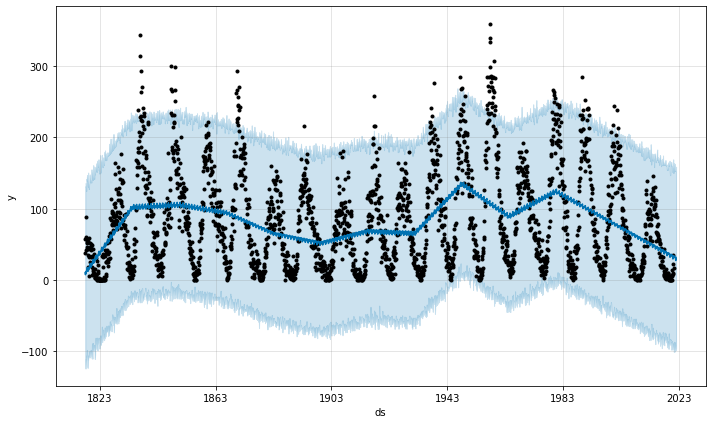

In [253]:
#plotting the forecasted data
plot1 = m.plot(forecast_monthly)

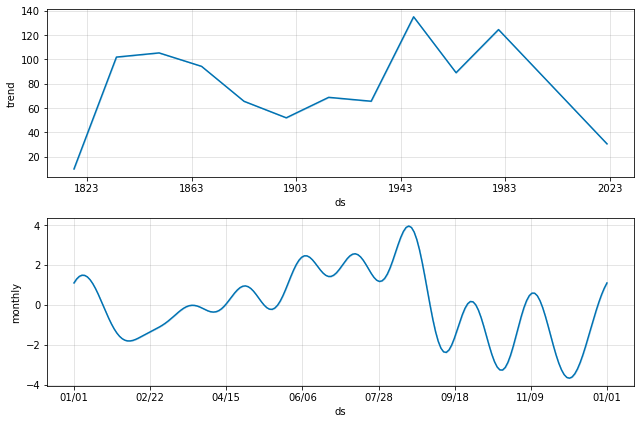

In [151]:
#Visualize each component
plot2 = m.plot_components(forecast_monthly)

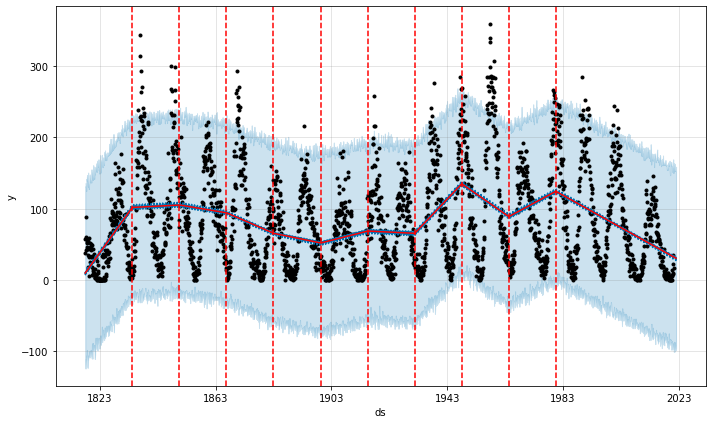

In [152]:
from prophet.plot import add_changepoints_to_plot
fig_monthly= m.plot(forecast_monthly)
a_monthly= add_changepoints_to_plot(fig_monthly.gca(), m, forecast_monthly)

# Cross Validation
##### For measuring forecast error by comparing the predicted values with the actual values
##### initial:the size of the initial training period
##### period : the spacing between cutoff dates
##### horizon : the forecast horizon((ds minus cutoff)
##### By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon

In [153]:
#Cross Validation
from fbprophet.diagnostics import cross_validation
monthly_df_cv = cross_validation(m, initial='70000 days', period='100 days', horizon = '200 days',parallel='processes')
monthly_df_cv.head()

INFO:fbprophet:Making 41 forecasts with cutoffs between 2009-08-31 00:00:00 and 2020-08-13 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f9e9886f6a0>


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2009-09-01,76.859048,-58.610813,198.046615,7.1,2009-08-31
1,2009-10-01,76.075246,-49.299098,200.377252,7.7,2009-08-31
2,2009-11-01,73.441856,-51.096399,200.271929,6.9,2009-08-31
3,2009-12-01,72.629195,-54.429942,199.548445,16.3,2009-08-31
4,2010-01-01,76.759171,-43.902602,206.600388,19.5,2009-08-31


# Performance metric

In [154]:
from fbprophet.diagnostics import performance_metrics
monthly_df_p = performance_metrics(monthly_df_cv)
monthly_df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,22 days,1682.421614,41.017333,37.386591,18.005044,0.801196,1.0
1,23 days,1539.521887,39.236742,35.680917,17.204364,0.528383,1.0
2,26 days,1561.968542,39.521748,35.913265,18.152389,0.528383,1.0
3,27 days,1665.601697,40.811784,37.133700,11.320754,0.528383,1.0
4,30 days,1598.891672,39.986143,35.805013,11.248610,0.528383,1.0
...,...,...,...,...,...,...,...
88,191 days,1311.312561,36.212050,31.828026,8.752230,1.047402,1.0
89,192 days,1468.888583,38.326082,33.359032,8.620220,0.528772,1.0
90,196 days,1509.610390,38.853705,34.580361,16.045599,1.047402,1.0
91,197 days,1528.856469,39.100594,35.163419,16.051095,1.047402,1.0


# Visualizing Performance Metrics

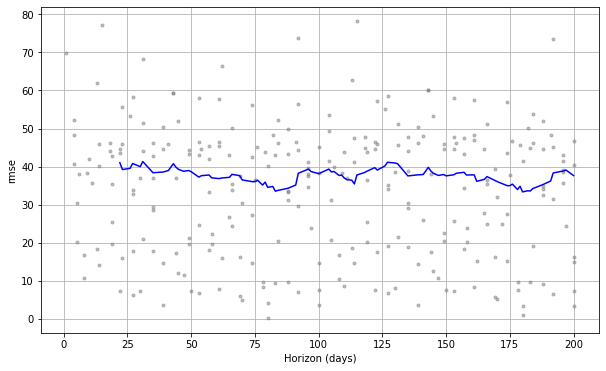

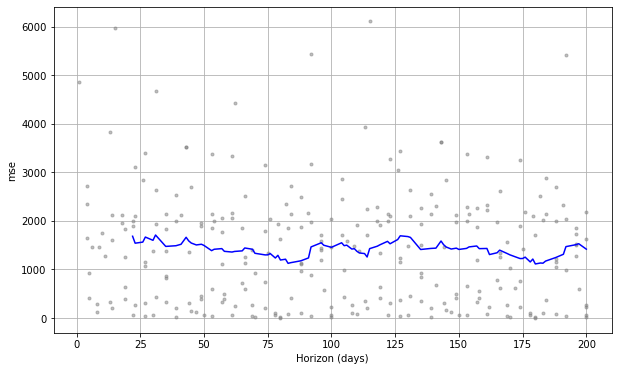

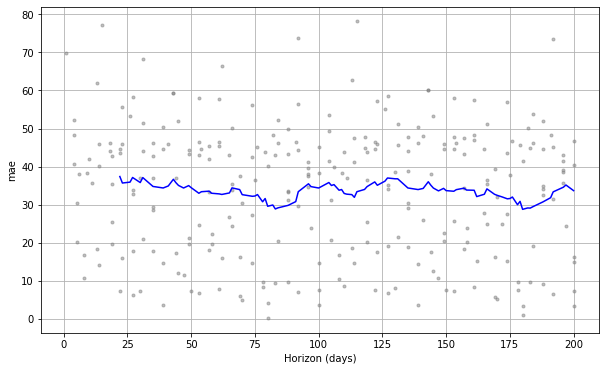

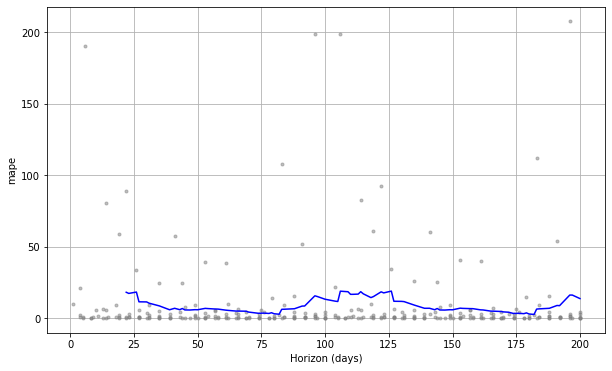

In [155]:
from fbprophet.plot import plot_cross_validation_metric
fig_cv= plot_cross_validation_metric(monthly_df_cv, metric='rmse')
fig_cv1 = plot_cross_validation_metric(monthly_df_cv, metric='mse')
fig_cv2 = plot_cross_validation_metric(monthly_df_cv, metric='mae')
fig_cv3 = plot_cross_validation_metric(monthly_df_cv, metric='mape')

# R2 Score and MAE

In [156]:
from sklearn.metrics import r2_score
r2_score(monthly_df_cv.y,monthly_df_cv.yhat)

0.14372483167821903

In [157]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(monthly_df_cv.y,monthly_df_cv.yhat)

33.72616673405928

# Finding and Removing outliers

In [158]:
monthly_df.y.mean()

83.17293972939729

In [159]:
monthly_df.y.std()

68.62424662452392

In [160]:
upper = monthly_df.y.mean() + 3*monthly_df.y.std()
lower = monthly_df.y.mean() - 3*monthly_df.y.std()
print('upper',upper)
print('lower',lower)

upper 289.045679602969
lower -122.69980014417447


In [161]:
monthly_df[(monthly_df.y > upper) | (monthly_df.y < lower)]

,ds,y
1055,1836-12-01,343.8
1056,1837-01-01,313.4
1057,1837-02-01,292.6
1185,1847-10-01,300.6
1200,1849-01-01,298.3
1456,1870-05-01,293.6
2504,1957-09-01,334.0
2505,1957-10-01,359.4
2506,1957-11-01,298.6
2507,1957-12-01,339.0


In [162]:
monthly_df_out = monthly_df[(monthly_df.y < upper) & (monthly_df.y > lower)]
monthly_df_out.shape

(2428, 2)

In [163]:
monthly_df.shape[0] - monthly_df_out.shape[0]

11

# Forecast - 1 month

In [164]:
monthly_1= pd.read_csv(r"monthly.csv",sep=';',engine='python',names=['Year', 'Month', 'Decimal Date', 'Sunspot Number', 'Standard Deviation', 'Number of Observations', 'Definitive/Provisional indicator'],parse_dates= {"Date" : ["Year","Month"]})
monthly_1.replace({
    "Sunspot Number":-1,
    "Standard Deviation":-1
},np.NaN,inplace=True)
monthly_1.dropna(how="any",inplace=True)

In [165]:
monthly_1.drop(['Decimal Date','Standard Deviation','Number of Observations','Definitive/Provisional indicator'],axis=1,inplace=True)
monthly_1.columns = ['ds','y'] 

In [166]:
#floor and cap
floor = monthly_1.y.quantile(0.05)
monthly_1['floor'] = floor
cap = monthly_1.y.quantile(0.95)
monthly_1['cap'] = cap

In [167]:
m1 = Prophet(growth='logistic',interval_width=0.95,changepoint_range=0.8,n_changepoints=25,seasonality_prior_scale=25,changepoint_prior_scale=10, seasonality_mode='additive',yearly_seasonality=False, weekly_seasonality=False, daily_seasonality= False).add_seasonality(name='monthly', period= 365,fourier_order=8)
model_m1 = m1.fit(monthly_1)

In [168]:
future_monthly_1= m1.make_future_dataframe(periods=1, freq = 'M', include_history= True)
future_monthly_1['floor'] = floor
future_monthly_1['cap'] = cap
forecast_monthly_1= m1.predict(future_monthly_1)
forecast_monthly_1

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1818-01-01,37.258989,217.9,2.99,-83.350986,170.091564,37.258989,37.258989,-0.332859,-0.332859,-0.332859,-0.332859,-0.332859,-0.332859,0.0,0.0,0.0,36.926131
1,1818-02-01,37.249042,217.9,2.99,-84.701101,149.316813,37.249042,37.249042,-3.212091,-3.212091,-3.212091,-3.212091,-3.212091,-3.212091,0.0,0.0,0.0,34.036951
2,1818-03-01,37.240059,217.9,2.99,-84.438581,156.862426,37.240059,37.240059,1.693346,1.693346,1.693346,1.693346,1.693346,1.693346,0.0,0.0,0.0,38.933405
3,1818-04-01,37.230117,217.9,2.99,-88.630453,156.385431,37.230117,37.230117,-1.938657,-1.938657,-1.938657,-1.938657,-1.938657,-1.938657,0.0,0.0,0.0,35.291459
4,1818-05-01,37.220497,217.9,2.99,-87.146163,154.254548,37.220497,37.220497,-0.765478,-0.765478,-0.765478,-0.765478,-0.765478,-0.765478,0.0,0.0,0.0,36.455019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,2020-12-01,37.472833,217.9,2.99,-86.660558,147.915360,37.472833,37.472833,-2.847323,-2.847323,-2.847323,-2.847323,-2.847323,-2.847323,0.0,0.0,0.0,34.625509
2436,2021-01-01,37.345214,217.9,2.99,-74.503575,162.753926,37.345214,37.345214,1.381125,1.381125,1.381125,1.381125,1.381125,1.381125,0.0,0.0,0.0,38.726339
2437,2021-02-01,37.217978,217.9,2.99,-89.396659,154.814565,37.217978,37.217978,-1.994346,-1.994346,-1.994346,-1.994346,-1.994346,-1.994346,0.0,0.0,0.0,35.223633
2438,2021-03-01,37.103384,217.9,2.99,-80.234375,159.563416,37.103384,37.103384,-0.839868,-0.839868,-0.839868,-0.839868,-0.839868,-0.839868,0.0,0.0,0.0,36.263516


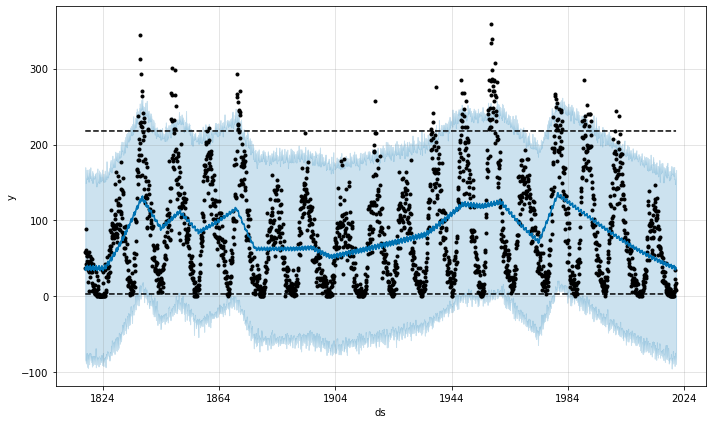

In [169]:
plot_1=m1.plot(forecast_monthly_1)

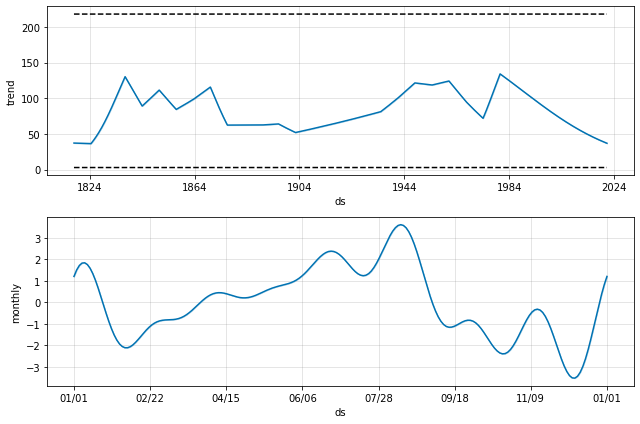

In [170]:
plot_1_2 = m1.plot_components(forecast_monthly_1)

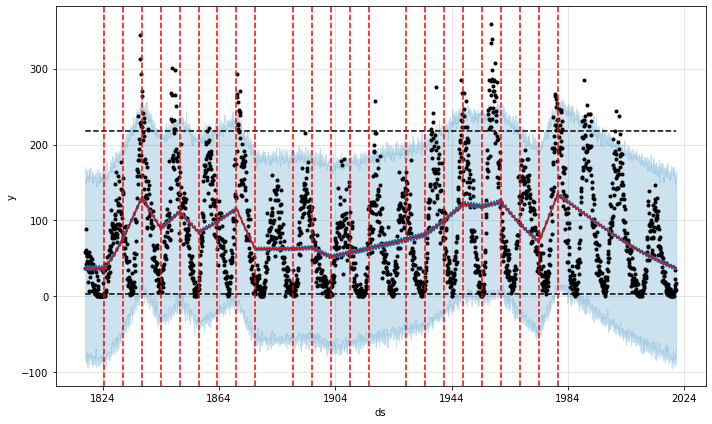

In [171]:
#Changepoints
fig_1= m1.plot(forecast_monthly_1)
a_1= add_changepoints_to_plot(fig_1.gca(), m1, forecast_monthly_1)

In [172]:
#Cross Validation
monthly_1_cv = cross_validation(m1, initial='70500 days', period='100 days', horizon = '200 days',parallel='processes')
monthly_1_cv.head()

INFO:fbprophet:Making 36 forecasts with cutoffs between 2011-01-13 00:00:00 and 2020-08-13 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f9e97ad0190>


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-02-01,67.182972,-59.024961,188.433383,48.3,2011-01-13
1,2011-03-01,67.609769,-46.953902,199.833011,78.6,2011-01-13
2,2011-04-01,68.378456,-62.510589,187.988969,76.1,2011-01-13
3,2011-05-01,68.044698,-53.847009,188.890787,58.2,2011-01-13
4,2011-06-01,69.535397,-55.161076,190.326271,56.1,2011-01-13


In [173]:
#Performance metrics
monthly_1_p = performance_metrics(monthly_1_cv)
monthly_1_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,22 days,1431.299161,37.832515,34.099132,20.989011,0.538923,1.0
1,23 days,1411.894696,37.575187,33.659120,20.543129,0.405030,1.0
2,26 days,1510.468489,38.864746,34.902335,21.993902,0.411826,1.0
3,27 days,1591.439552,39.892851,35.738500,13.522061,0.461648,1.0
4,30 days,1523.534583,39.032481,34.283147,13.391628,0.411826,1.0
...,...,...,...,...,...,...,...
83,191 days,1211.344211,34.804371,30.563224,10.115793,0.956181,1.0
84,192 days,1453.331815,38.122589,33.071973,10.004941,0.536425,1.0
85,196 days,1520.409095,38.992424,34.542986,19.009717,0.960926,1.0
86,197 days,1452.035524,38.105584,33.590891,18.364131,0.536425,1.0


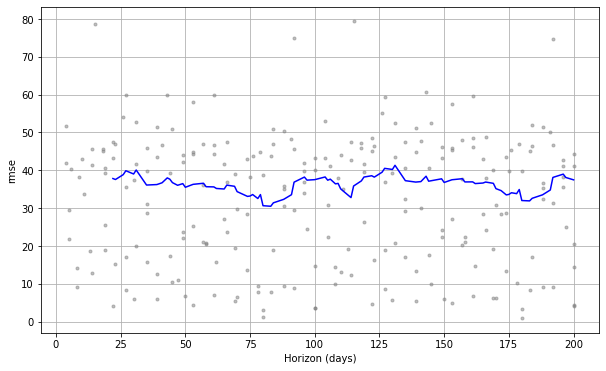

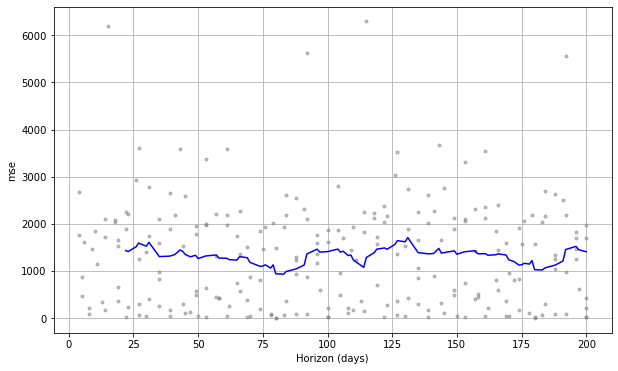

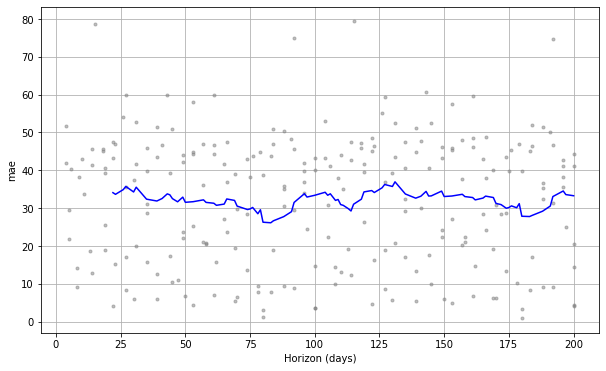

In [174]:
fig_cv= plot_cross_validation_metric(monthly_1_cv, metric='rmse')
fig_cv1 = plot_cross_validation_metric(monthly_1_cv, metric='mse')
fig_cv2 = plot_cross_validation_metric(monthly_1_cv, metric='mae')

In [175]:
r2_score(monthly_1_cv.y,monthly_1_cv.yhat)

0.2625476730424068

In [176]:
mean_absolute_error(monthly_1_cv.y,monthly_1_cv.yhat)

32.16324026111781

# Forecast- 6 months

In [177]:
monthly_6= pd.read_csv(r"monthly.csv",sep=';',engine='python',names=['Year', 'Month', 'Decimal Date', 'Sunspot Number', 'Standard Deviation', 'Number of Observations', 'Definitive/Provisional indicator'],parse_dates= {"Date" : ["Year","Month"]})
monthly_6.replace({
    "Sunspot Number":-1,
    "Standard Deviation":-1
},np.NaN,inplace=True)
monthly_6.dropna(how="any",inplace=True)

In [178]:
monthly_6.drop(['Decimal Date','Standard Deviation','Number of Observations','Definitive/Provisional indicator'],axis=1,inplace=True)
monthly_6.columns = ['ds','y'] 

In [179]:
#floor and cap
floor = monthly_6.y.quantile(0.05)
monthly_6['floor'] = floor
cap = monthly_6.y.quantile(0.95)
monthly_6['cap'] = cap

In [180]:
m6 = Prophet(growth='logistic',interval_width=0.95,changepoint_range=0.8,n_changepoints=25,seasonality_prior_scale=25,changepoint_prior_scale=10, seasonality_mode='additive',yearly_seasonality=False, weekly_seasonality=False, daily_seasonality= False).add_seasonality(name='monthly', period= 365,fourier_order=8)
model_m6 = m6.fit(monthly_6)

In [181]:
future_monthly_6= m6.make_future_dataframe(periods=6, freq = 'M', include_history= True)
future_monthly_6['floor'] = floor
future_monthly_6['cap'] = cap
forecast_monthly_6= m6.predict(future_monthly_6)
forecast_monthly_6

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1818-01-01,37.258989,217.9,2.99,-93.095689,157.968353,37.258989,37.258989,-0.332859,-0.332859,-0.332859,-0.332859,-0.332859,-0.332859,0.0,0.0,0.0,36.926131
1,1818-02-01,37.249042,217.9,2.99,-79.689912,152.654018,37.249042,37.249042,-3.212091,-3.212091,-3.212091,-3.212091,-3.212091,-3.212091,0.0,0.0,0.0,34.036951
2,1818-03-01,37.240059,217.9,2.99,-89.066873,168.694500,37.240059,37.240059,1.693346,1.693346,1.693346,1.693346,1.693346,1.693346,0.0,0.0,0.0,38.933405
3,1818-04-01,37.230117,217.9,2.99,-89.678490,156.030720,37.230117,37.230117,-1.938657,-1.938657,-1.938657,-1.938657,-1.938657,-1.938657,0.0,0.0,0.0,35.291459
4,1818-05-01,37.220497,217.9,2.99,-81.345397,150.814939,37.220497,37.220497,-0.765478,-0.765478,-0.765478,-0.765478,-0.765478,-0.765478,0.0,0.0,0.0,36.455019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,2021-04-30,36.858873,217.9,2.99,-86.556405,159.693152,36.858873,36.858873,0.233987,0.233987,0.233987,0.233987,0.233987,0.233987,0.0,0.0,0.0,37.092860
2441,2021-05-31,36.733102,217.9,2.99,-91.621494,156.845348,36.733102,36.733102,0.989250,0.989250,0.989250,0.989250,0.989250,0.989250,0.0,0.0,0.0,37.722352
2442,2021-06-30,36.611750,217.9,2.99,-91.341742,158.325771,36.611750,36.611750,2.264886,2.264886,2.264886,2.264886,2.264886,2.264886,0.0,0.0,0.0,38.876635
2443,2021-07-31,36.486727,217.9,2.99,-74.655406,159.245904,36.486727,36.493563,2.487548,2.487548,2.487548,2.487548,2.487548,2.487548,0.0,0.0,0.0,38.974274


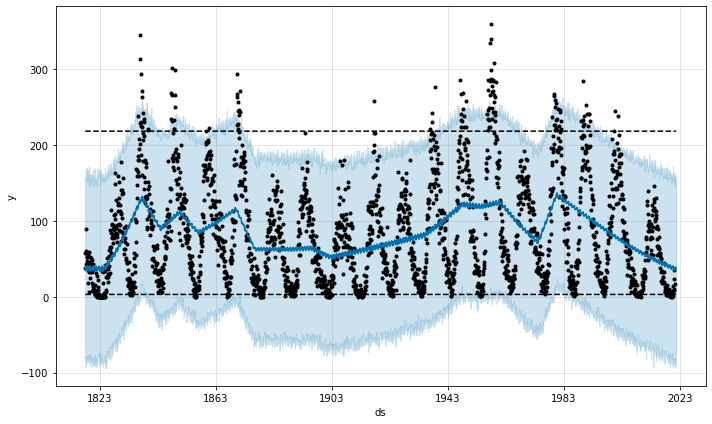

In [182]:
plot_1=m6.plot(forecast_monthly_6)

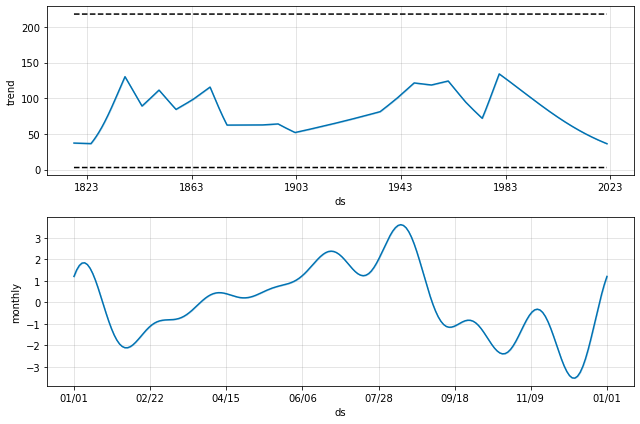

In [183]:
plot_1_2 = m6.plot_components(forecast_monthly_6)

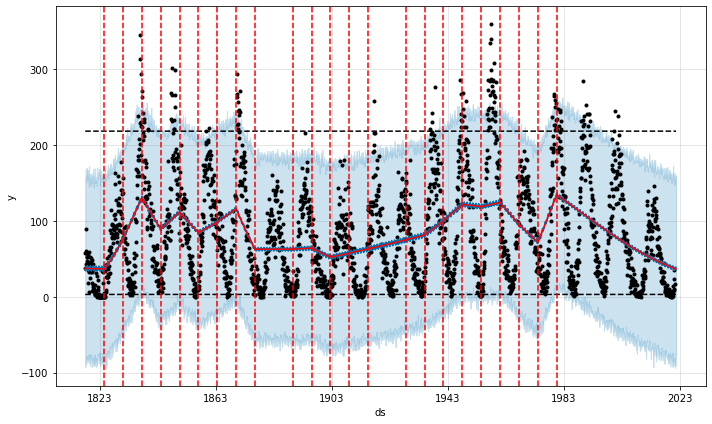

In [184]:
#Changepoints
fig_1= m6.plot(forecast_monthly_6)
a_1= add_changepoints_to_plot(fig_1.gca(), m6, forecast_monthly_6)

In [215]:
#Cross Validation
monthly_6_cv = cross_validation(m6, initial='70500 days', period='180 days', horizon = '365 days',parallel='processes')
monthly_6_cv.head()

INFO:fbprophet:Making 19 forecasts with cutoffs between 2011-04-18 00:00:00 and 2020-03-01 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f9e8249b070>


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-05-01,67.269580,-53.204569,180.482778,58.2,2011-04-18
1,2011-06-01,68.789875,-53.279306,188.706069,56.1,2011-04-18
2,2011-07-01,69.916087,-52.783271,185.060727,64.5,2011-04-18
3,2011-08-01,69.486639,-57.189318,186.018232,65.8,2011-04-18
4,2011-09-01,67.714774,-48.370408,190.926026,120.1,2011-04-18


In [216]:
#Performance metrics
monthly_6_p = performance_metrics(monthly_6_cv)
monthly_6_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,1316.151081,36.278797,31.940734,6.503606,0.418427,1.0
1,40 days,1308.584515,36.174363,31.730575,6.507195,0.418427,1.0
2,44 days,1389.173299,37.271615,33.733441,6.597828,0.481370,1.0
3,45 days,1432.148745,37.843741,34.330203,6.664901,0.481370,1.0
4,47 days,1501.984101,38.755440,35.491531,6.659852,0.418427,1.0
...,...,...,...,...,...,...,...
163,359 days,1585.164612,39.814126,36.003196,19.481065,0.471639,1.0
164,360 days,1606.766878,40.084497,36.481121,18.456005,0.471639,1.0
165,362 days,1563.608808,39.542494,35.979005,16.114306,0.471639,1.0
166,364 days,1390.858039,37.294209,33.375787,9.259087,0.457894,1.0


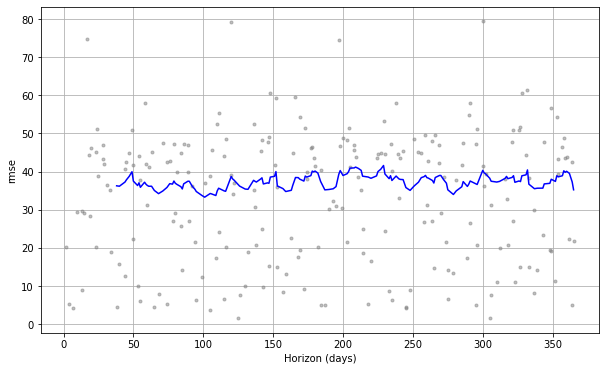

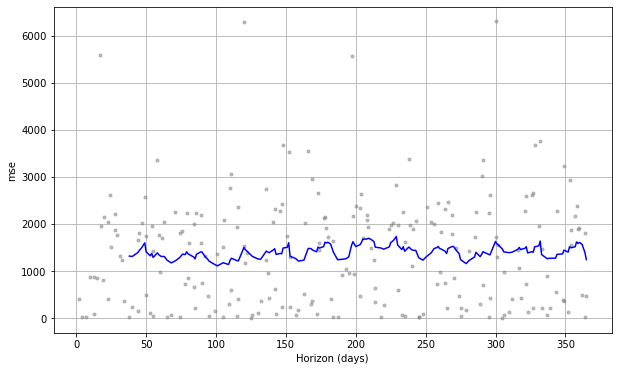

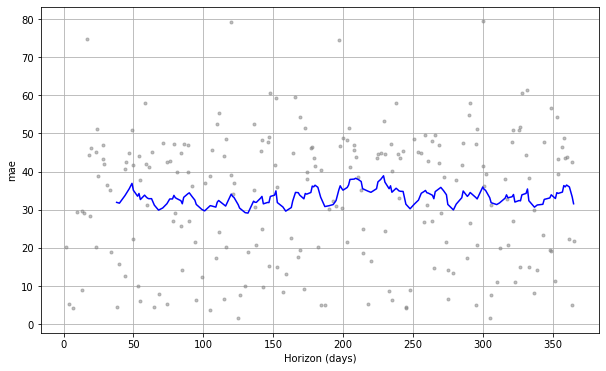

In [217]:
fig_cv= plot_cross_validation_metric(monthly_6_cv, metric='rmse')
fig_cv1 = plot_cross_validation_metric(monthly_6_cv, metric='mse')
fig_cv2 = plot_cross_validation_metric(monthly_6_cv, metric='mae')

In [218]:
r2_score(monthly_6_cv.y,monthly_6_cv.yhat)

0.22864486426704123

In [219]:
mean_absolute_error(monthly_6_cv.y,monthly_6_cv.yhat)

33.35301588557353

# Forecast - 9 months

In [220]:
monthly_9= pd.read_csv(r"monthly.csv",sep=';',engine='python',names=['Year', 'Month', 'Decimal Date', 'Sunspot Number', 'Standard Deviation', 'Number of Observations', 'Definitive/Provisional indicator'],parse_dates= {"Date" : ["Year","Month"]})
monthly_9.replace({
    "Sunspot Number":-1,
    "Standard Deviation":-1
},np.NaN,inplace=True)
monthly_9.dropna(how="any",inplace=True)

In [221]:
monthly_9.drop(['Decimal Date','Standard Deviation','Number of Observations','Definitive/Provisional indicator'],axis=1,inplace=True)
monthly_9.columns = ['ds','y'] 

In [222]:
#floor and cap
floor = monthly_9.y.quantile(0.05)
monthly_9['floor'] = floor
cap = monthly_9.y.quantile(0.95)
monthly_9['cap'] = cap

In [223]:
m9 = Prophet(growth='logistic',interval_width=0.95,changepoint_range=0.8,n_changepoints=25,seasonality_prior_scale=25,changepoint_prior_scale=10, seasonality_mode='additive',yearly_seasonality=False, weekly_seasonality=False, daily_seasonality= False).add_seasonality(name='monthly', period= 365,fourier_order=8)
model_m9 = m9.fit(monthly_9)

In [224]:
future_monthly_9= m6.make_future_dataframe(periods=6, freq = 'M', include_history= True)
future_monthly_9['floor'] = floor
future_monthly_9['cap'] = cap
forecast_monthly_9= m9.predict(future_monthly_9)
forecast_monthly_9

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1818-01-01,37.258989,217.9,2.99,-73.658380,161.345327,37.258989,37.258989,-0.332859,-0.332859,-0.332859,-0.332859,-0.332859,-0.332859,0.0,0.0,0.0,36.926131
1,1818-02-01,37.249042,217.9,2.99,-94.154072,155.404599,37.249042,37.249042,-3.212091,-3.212091,-3.212091,-3.212091,-3.212091,-3.212091,0.0,0.0,0.0,34.036951
2,1818-03-01,37.240059,217.9,2.99,-78.327723,164.411213,37.240059,37.240059,1.693346,1.693346,1.693346,1.693346,1.693346,1.693346,0.0,0.0,0.0,38.933405
3,1818-04-01,37.230117,217.9,2.99,-95.353511,149.011455,37.230117,37.230117,-1.938657,-1.938657,-1.938657,-1.938657,-1.938657,-1.938657,0.0,0.0,0.0,35.291459
4,1818-05-01,37.220497,217.9,2.99,-84.278829,161.637380,37.220497,37.220497,-0.765478,-0.765478,-0.765478,-0.765478,-0.765478,-0.765478,0.0,0.0,0.0,36.455019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,2021-04-30,36.858873,217.9,2.99,-84.405846,158.097667,36.858873,36.858873,0.233987,0.233987,0.233987,0.233987,0.233987,0.233987,0.0,0.0,0.0,37.092860
2441,2021-05-31,36.733102,217.9,2.99,-83.851977,158.111185,36.733102,36.733102,0.989250,0.989250,0.989250,0.989250,0.989250,0.989250,0.0,0.0,0.0,37.722352
2442,2021-06-30,36.611750,217.9,2.99,-89.646966,153.888406,36.611750,36.611750,2.264886,2.264886,2.264886,2.264886,2.264886,2.264886,0.0,0.0,0.0,38.876635
2443,2021-07-31,36.486727,217.9,2.99,-74.607635,155.898186,36.486727,36.486727,2.487548,2.487548,2.487548,2.487548,2.487548,2.487548,0.0,0.0,0.0,38.974274


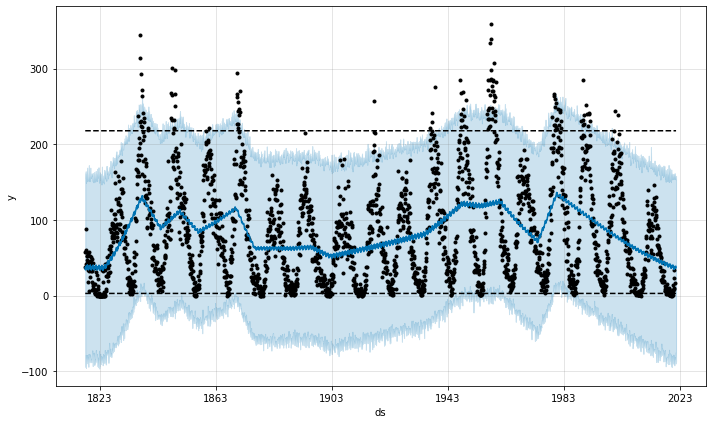

In [225]:
plot_1=m9.plot(forecast_monthly_9)

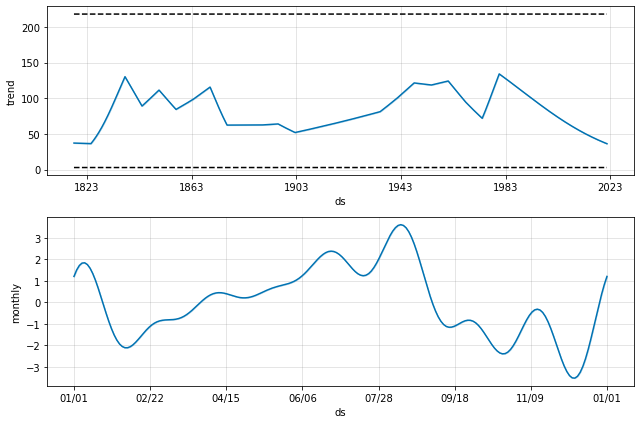

In [226]:
plot_1_2 = m9.plot_components(forecast_monthly_9)

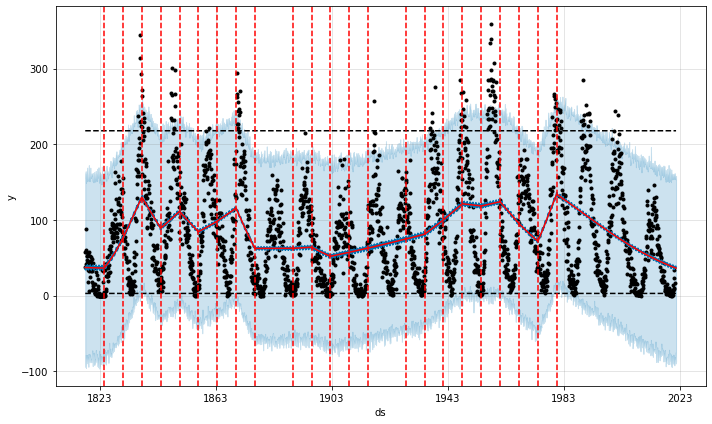

In [227]:
#Changepoints
fig_1= m9.plot(forecast_monthly_9)
a_1= add_changepoints_to_plot(fig_1.gca(), m9, forecast_monthly_9)

In [248]:
#Cross Validation
monthly_9_cv = cross_validation(m9, initial='71000 days', period='180 days', horizon = '365 days',parallel='processes')
monthly_9_cv.head()

INFO:fbprophet:Making 16 forecasts with cutoffs between 2012-10-09 00:00:00 and 2020-03-01 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f9e83c5c490>


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-11-01,67.462595,-52.190520,184.126967,87.6,2012-10-09
1,2012-12-01,66.925923,-51.965138,182.008262,56.8,2012-10-09
2,2013-01-01,70.437318,-48.933736,192.130843,96.1,2012-10-09
3,2013-02-01,67.420101,-62.389786,187.667324,60.9,2012-10-09
4,2013-03-01,68.608611,-46.562691,190.710525,78.3,2012-10-09


In [249]:
#Performance metrics
monthly_9_p = performance_metrics(monthly_9_cv)
monthly_9_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,1182.911620,34.393482,31.078285,7.478530,0.425029,1.0
1,40 days,1174.150334,34.265877,30.834943,7.482686,0.425029,1.0
2,44 days,1259.881426,35.494808,32.702981,7.579132,0.776856,1.0
3,45 days,1354.374574,36.801828,34.726774,7.694274,0.888212,1.0
4,49 days,1444.490742,38.006457,35.850031,8.122313,0.903542,1.0
...,...,...,...,...,...,...,...
146,359 days,1727.227634,41.559928,38.005831,22.518140,0.524280,1.0
147,360 days,1752.240783,41.859775,38.559218,21.331228,2.696403,1.0
148,362 days,1702.268281,41.258554,37.977822,18.619787,0.524280,1.0
149,364 days,1502.241076,38.758755,34.963569,10.682166,0.524280,1.0


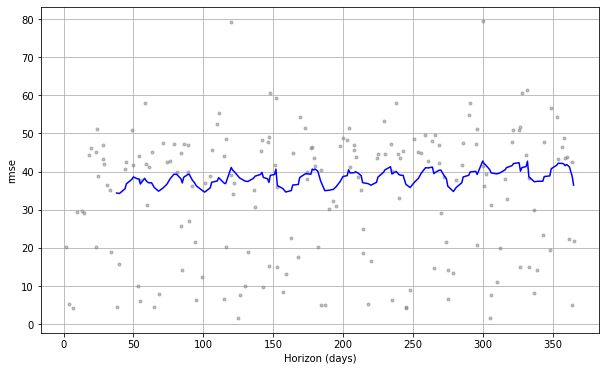

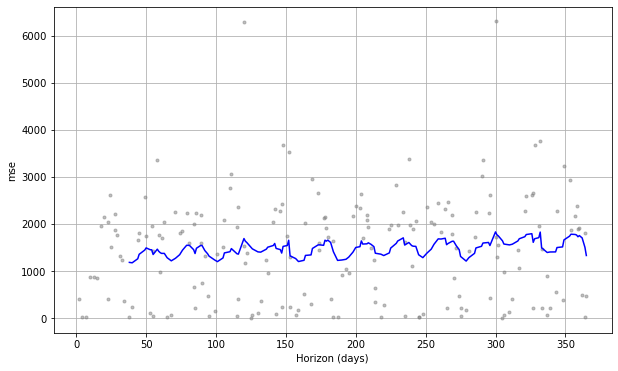

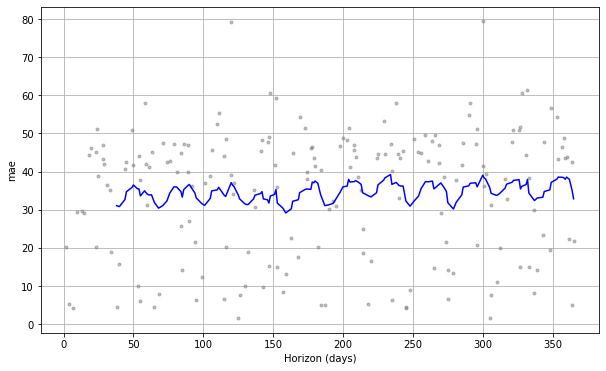

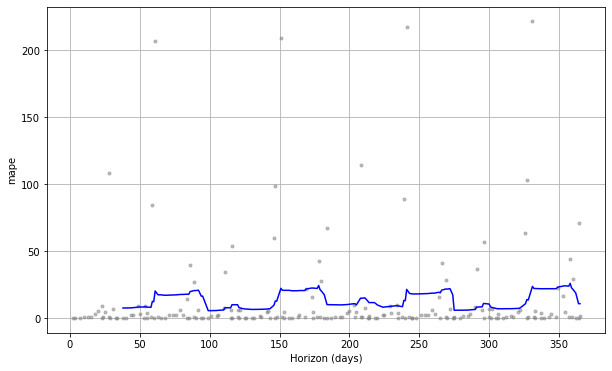

In [250]:
fig_cv= plot_cross_validation_metric(monthly_9_cv, metric='rmse')
fig_cv1 = plot_cross_validation_metric(monthly_9_cv, metric='mse')
fig_cv2 = plot_cross_validation_metric(monthly_9_cv, metric='mae')
fig_cv3 = plot_cross_validation_metric(monthly_9_cv, metric='mape')

In [251]:
r2_score(monthly_9_cv.y,monthly_9_cv.yhat)

0.15452421834372

In [252]:
mean_absolute_error(monthly_9_cv.y,monthly_9_cv.yhat)

34.64357142655033